# ***Global Countries Information 2023***

## 1. Introduction

This comprehensive notebook provides a wealth of information about countries worldwide, encompassing a wide range of indicators and attributes. With demographic statistics, economic indicators, environmental factors, healthcare metrics, education statistics, and more, this dataset offers a complete global perspective on various aspects of nations. We will delve into the data to extract insights, perform exploratory data analysis (EDA), and draw meaningful conclusions.

## 2. Data Cleaning & Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load Dataset
df = pd.read_csv('/kaggle/input/countries-of-the-world-2023/world-data-2023.csv')

In [3]:
# Data Type Conversion:
columns_to_convert = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                      'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price', 'GDP',
                      'Gross primary education enrollment (%)', 'Armed Forces size',
                      'Gross tertiary education enrollment (%)', 'Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 
                      'Out of pocket health expenditure', 'Physicians per thousand', 
                      'Population', 'Population: Labor force participation (%)', 
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))

In [4]:
# List of columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Impute numerical columns with mean
numerical_columns = df.select_dtypes(include=['float64'])
numerical_columns = numerical_columns.columns[numerical_columns.isnull().any()]
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Impute categorical columns with mode
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.columns[categorical_columns.isnull().any()]
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Verify if all missing values are handled
missing_counts = df.isnull().sum()
print(missing_counts)

Country                                      0
Density\n(P/Km2)                             0
Abbreviation                                 0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Calling Code                                 0
Capital/Major City                           0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Currency-Code                                0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Largest city                                 0
Life expectan

## 3. Top 20 Countries: Highest Unemployment

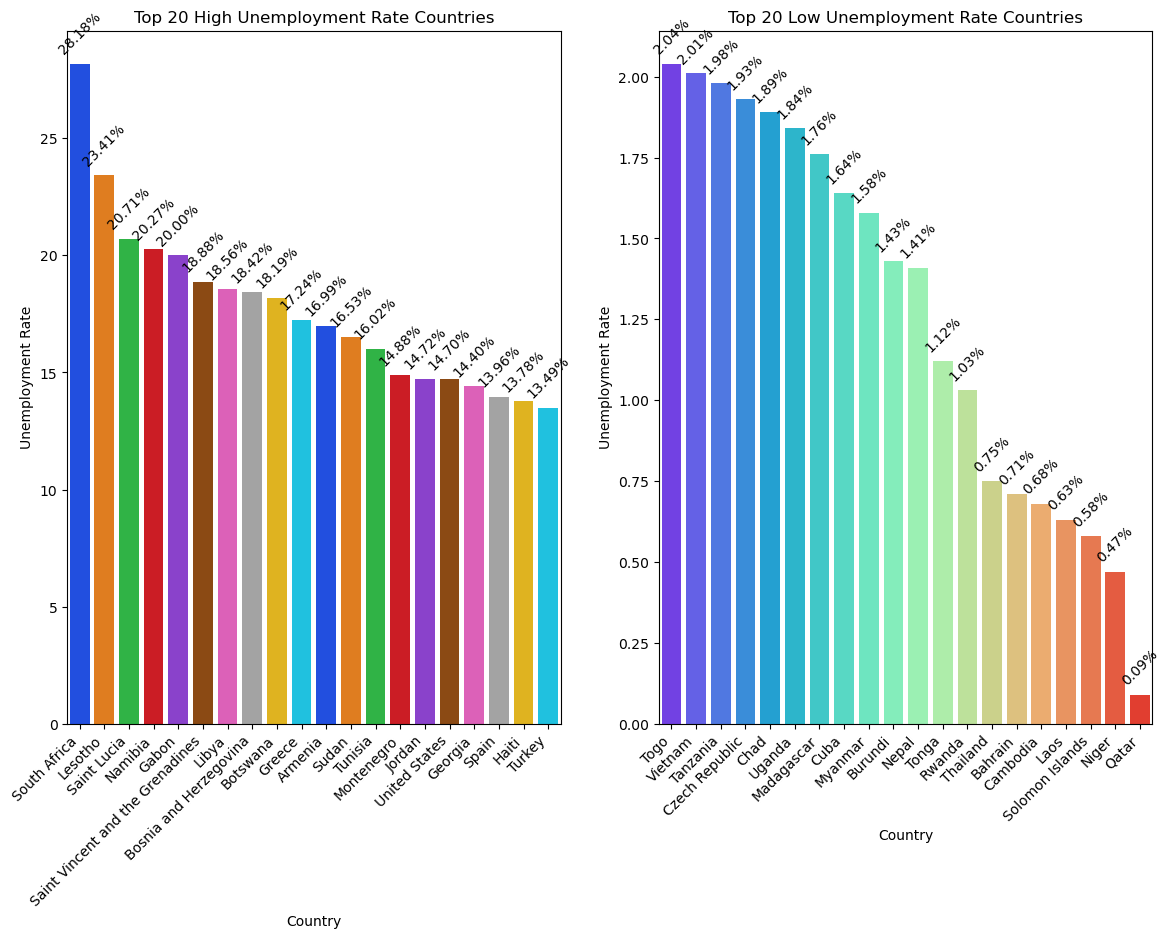

In [5]:
sorted_df = df.sort_values(by = 'Unemployment rate', ascending = False)

top_high_unemployment = sorted_df.head(20)
top_low_unemployment = sorted_df.tail(20)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# Plot for high unemployment countries
sns.barplot(data=top_high_unemployment, x='Country', y='Unemployment rate', palette='bright', ax=axes[0])
axes[0].set_title('Top 20 High Unemployment Rate Countries')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Unemployment Rate')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points', rotation = 45)

# Plot for low unemployment countries
sns.barplot(data=top_low_unemployment, x='Country', y='Unemployment rate', palette='rainbow', ax=axes[1])
axes[1].set_title('Top 20 Low Unemployment Rate Countries')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Unemployment Rate')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points', rotation = 45)
plt.show()

## 4. Top 20 Countries: Highest Population

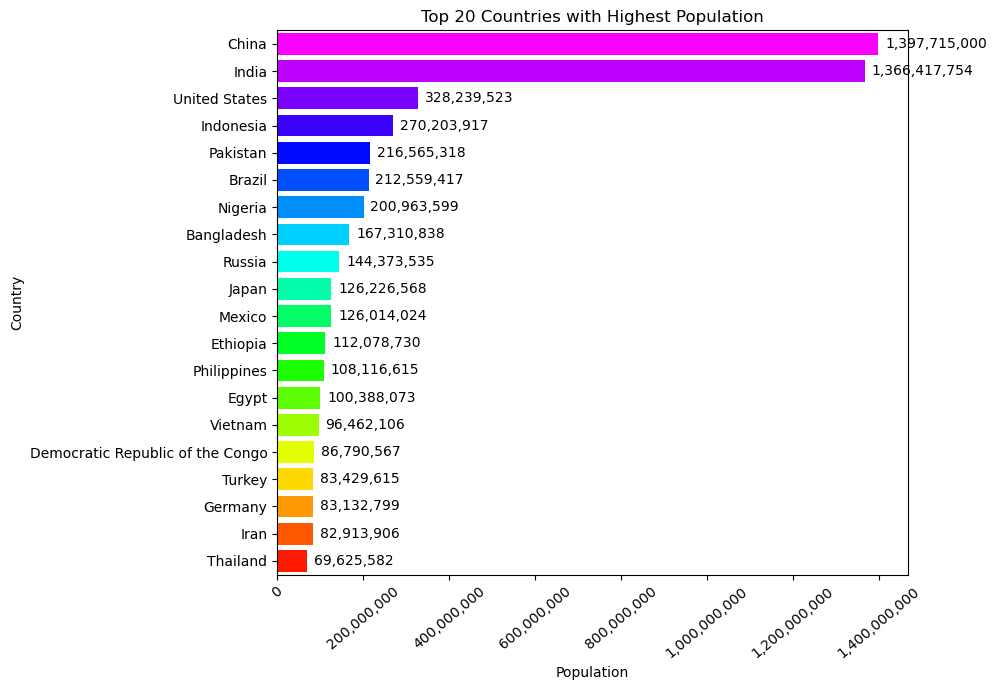

In [6]:
import matplotlib.ticker as ticker

sorted_df = df.sort_values(by='Population', ascending=False)

# Get the top 20 countries with the highest population
top_population_country = sorted_df.head(20)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot for top population countries
sns.barplot(data=top_population_country, x='Population', y='Country', palette='gist_rainbow_r', saturation=0.99, ax=axes)
axes.set_title('Top 20 Countries with Highest Population')
axes.set_xlabel('Population')
axes.set_ylabel('Country')
axes.set_xticklabels(['{:,}'.format(int(x)) for x in axes.get_xticks()], rotation = 40)
for p in axes.patches:
    axes.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 5. Top 20 Countries: Highest Birth Rates

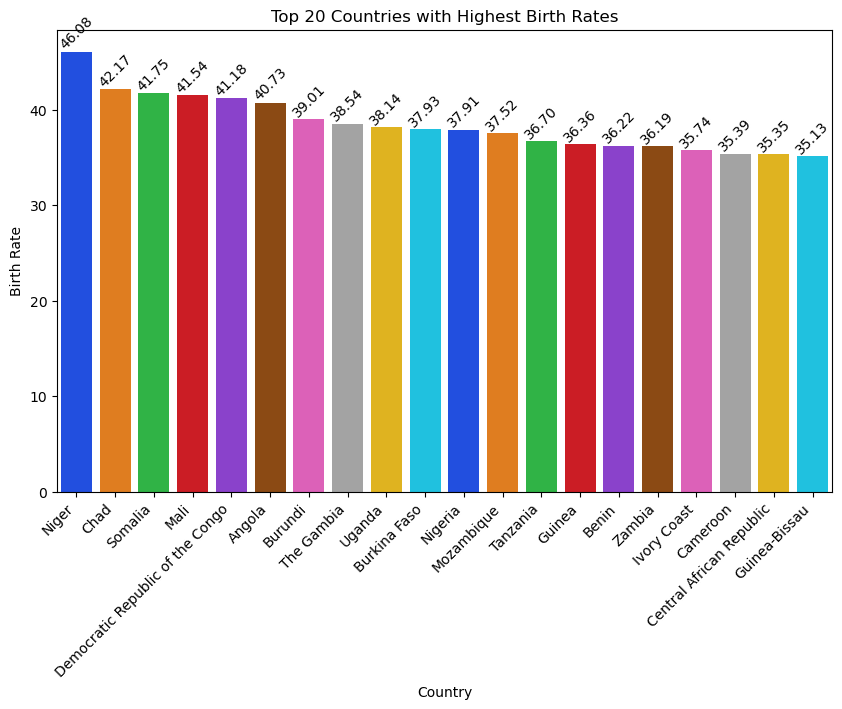

In [7]:
# Sort the dataframe by 'Birth Rate' column in descending order
sorted_df = df.sort_values(by='Birth Rate', ascending=False)

# Get the top 20 countries with the highest birth rates
top_country_birth = sorted_df.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_country_birth, x='Country', y='Birth Rate', palette='bright')

plt.title('Top 20 Countries with Highest Birth Rates')
plt.xlabel('Country')
plt.ylabel('Birth Rate')

plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top_country_birth['Birth Rate']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, rotation = 45)

# Show the plot
plt.show()


## 6. Top 20 Countries: Largest area

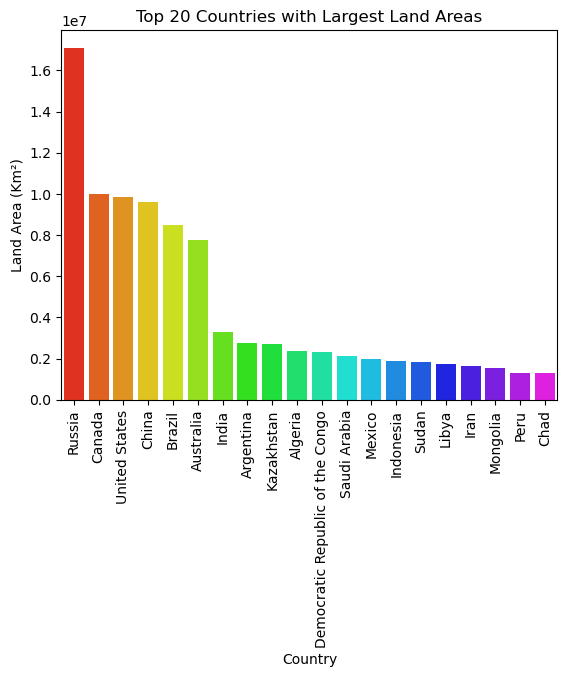

In [8]:
sorted_df = df.sort_values(by='Land Area(Km2)', ascending=False)
top_land_area_countries = sorted_df.head(20)
top_land_vs_population_countries = sorted_df.head(20)

sns.barplot(data=top_land_area_countries, x='Country', y='Land Area(Km2)', palette='gist_rainbow')
plt.title('Top 20 Countries with Largest Land Areas')
plt.xlabel('Country')
plt.ylabel('Land Area (Km²)')
plt.xticks(rotation = 90)

plt.show()

## 7. Top 20 Countries: Highest CO2 Emissions

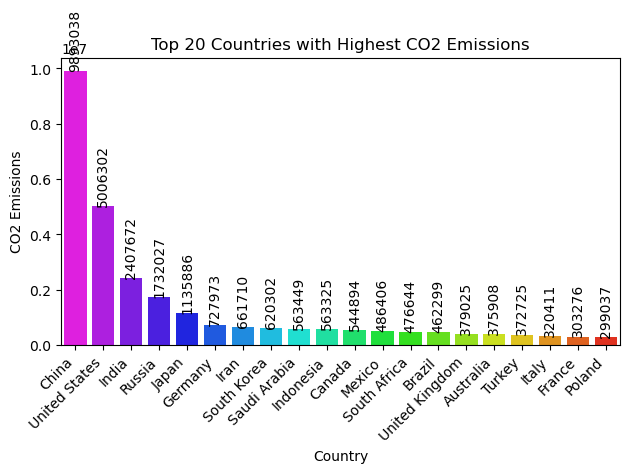

In [9]:
# Sort the DataFrame by CO2 emissions column in descending order and get the top 20 rows
top_co2_emissions_countries = df.sort_values(by='Co2-Emissions', ascending=False).head(20)

sns.barplot(data=top_co2_emissions_countries, x='Country', y='Co2-Emissions', palette='gist_rainbow_r')
plt.title('Top 20 Countries with Highest CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=45, ha='right')

for index , value in enumerate(top_co2_emissions_countries['Co2-Emissions']):
    plt.text(index, value,f'{value:.0f}',ha = 'center',va = 'bottom', fontsize = 10, rotation = 90)
plt.tight_layout()
plt.show()


## 8. Top 20 Countries: Highest GDP

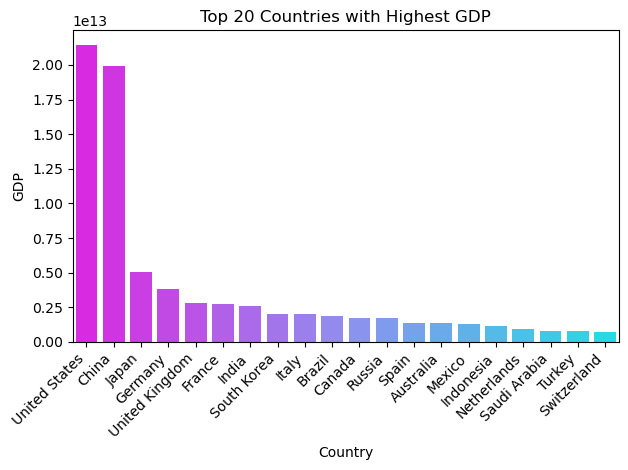

In [10]:
top_gdp_countries = df.sort_values(by='GDP', ascending=False).head(20)

sns.barplot(data=top_gdp_countries, x='Country', y='GDP', palette='cool_r')
plt.title('Top 20 Countries with Highest GDP')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 9. Urbanization Trends by Country

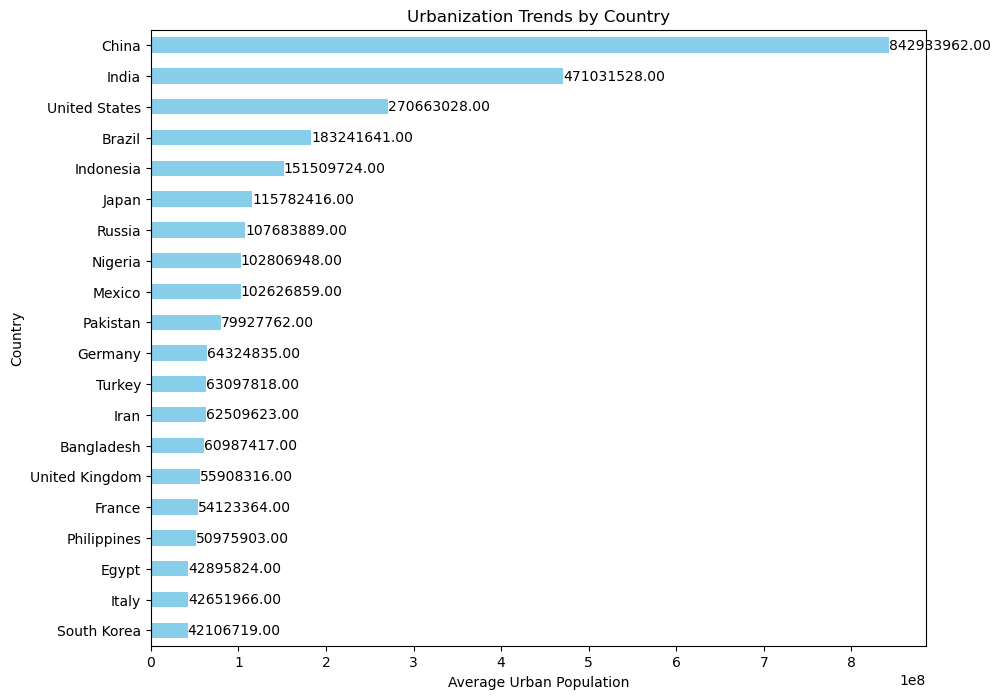

In [11]:
subset_countries = 20
urbanization_by_country = df.groupby('Country')['Urban_population'].mean().sort_values(ascending=False).head(subset_countries)

plt.figure(figsize=(10, 8))
ax = urbanization_by_country.plot(kind='barh', color='skyblue')
plt.title('Urbanization Trends by Country')
plt.xlabel('Average Urban Population')
plt.ylabel('Country')
plt.gca().invert_yaxis()

for index, value in enumerate(urbanization_by_country):
    ax.text(value + 2, index, f'{value:.2f}', va='center', color='black')  # Display values on a separate axis

plt.show()


## 10. Top 20 Countries: Highest Tertiary Education Enrollment Rates

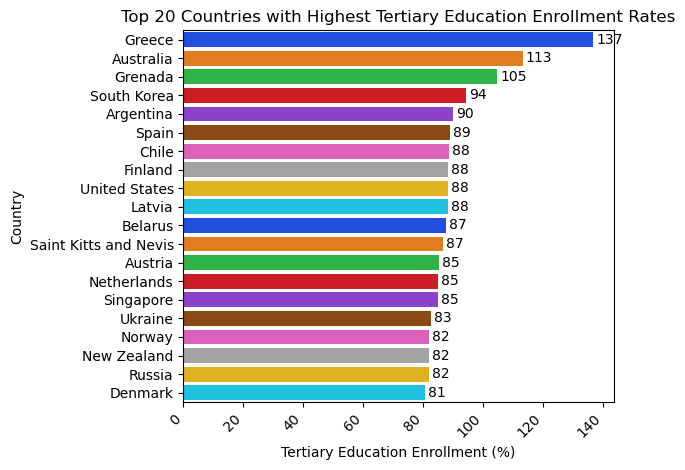

In [12]:
top_tertiary_enrollment_countries = df.sort_values(by='Gross tertiary education enrollment (%)', ascending=False).head(20)

ax = sns.barplot(data=top_tertiary_enrollment_countries, x='Gross tertiary education enrollment (%)', y='Country', palette='bright')
plt.title('Top 20 Countries with Highest Tertiary Education Enrollment Rates')
plt.xlabel('Tertiary Education Enrollment (%)')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top_tertiary_enrollment_countries['Gross tertiary education enrollment (%)']):
    ax.text(value + 1, index, f'{value:.0f}', va='center', color='black')

plt.tight_layout()
plt.show()